# Proste kwantowe obwody 

Na ostatnich zajęciach wyprodukowaliśmy klasyczną i kwantową sieć neuronową realizowaną w bibliotece PyTorch i Pennylane. 


Kod naszej wartwy ukrytej w której użyliśmy obwodu kwantowego realizował następujące obiekty i funkcje:
```python

import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
```

Na tych zajęciach nauczymy się tworzyć proste obwody kwantowe. 

Zaczynamy!


Obwody kwantowe składają się z rejestrów, które reprezentują poszczególne kubity.

![kibu1](../img/kubity1.png)

Domyślnie kubity inicjalizujemy w stanie 0.

![kibu2](../img/kubity2.png)


Liczbę rejestrów możesz ustalić parametrem `wires` przy definicji środowiska wykonawczego `device`. 

```python
dev = qml.device("default.qubit", wires=1)
```


Operacje wykonywane na kubitach nazywamy bramkami. 
Operacje te można wykonywać na jednym albo i wielu kubitach na raz. 
Domyślnie będziemy optymalizować algortymy aby składały się z jak najmniejszej ilości bramek działających na dużą liczbę kubitów. 


Graficznie można rozumieć realizację algorytmu jako stosowanie bramek na poszczególnych kubitach.

![kibu2](../img/obwod1.png)



W bibliotece PennyLane, `obwody kwantowe` reprezentowane są przez `kwantowe funkcje`, realizowane przez klasyczne funkcje w pythonie. 

Schemat kodu penny lane możemy zapisać jako: 

```python
import pennylane as qml

def my_quantum_function(params):

    # Operacje na pojedynczym kubicie (bez parametrów)
    qml.Gate1(wires=0)
    qml.Gate2(wires=1)

    # Operacje na pojedynczym kubicie z parametrem
    qml.Gate3(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])
```

Przykładowo

![](../img/przyklad1.png)


```python

def my_first_circuit(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])
```

![](../img/pennylane1.png)


Matematycznie całość możemy zapisać jako: 

![](../img/stanpennylane.png)


Tyle teoria ... a jak zakodować i wykorzystać ? 

## Jeden kubit

Przygotujmy kod dla obwodu kwantowego realizującego jeden kubit z którym nic nie robimy. 

In [1]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc():
    ## tu pojawi się kod przetwarzający nasz kubit
    ## ale teraz nic z nim nie robimy 
    return qml.state()

In [2]:
qc()

array([1.+0.j, 0.+0.j])

wektor $[1,0]$ można interpretować jako stan $\ket{0}$ czyli jako wartość bitu $0$.

Natomiast wykorzystując metodę `qml.probs()` możesz zwrócić kwadraty amplitud czyli prawdopodobieństow otrzymania 0 i 1. 

In [3]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc2():
    return qml.probs(wires=0)

In [4]:
qc2()

array([1., 0.])

zobaczmy jak zainicjalozować stan $\ket{1}= [0,1]^T$
$$
\ket{\psi}=\ket{1}
$$

In [5]:
from pennylane import numpy as np
from pennylane.ops import StatePrep

stan = np.array([0,1]) # stan do inicjalizacji

@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=0)
    return qml.state()

qc()

array([0.+0.j, 1.+0.j])

In [6]:
@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=0)
    return qml.probs()

qc()

array([0., 1.])

utwórzmy pełną superpozycję stanu 0 i 1. 
$$
\ket{\psi}=\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} ) 
$$

In [7]:
stan = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

@qml.qnode(dev)
def qc_s():
    qml.StatePrep(stan,wires=0)
    return qml.state()

print(f"amplitudy: {qc_s()}")


@qml.qnode(dev)
def qc_p():
    qml.StatePrep(stan,wires=0)
    return qml.probs()

print(f"prwadopodobieństwa: {qc_p()}")

print(f"test czy amp^2 = prawdopodobienstwo: {qc_s()**2 == qc_p()}")

amplitudy: [0.70710678+0.j 0.70710678+0.j]
prwadopodobieństwa: [0.5 0.5]
test czy amp^2 = prawdopodobienstwo: [ True  True]


**ZADANIE** Napisz funkcję generującą stan jednego kubitu jako funkcję kąta $\theta$ 
```python
def stan_kubitu(theta):
    pass # Twoj kod 
```

> $\ket{\psi}= [\cos(\frac{\theta}{2}), \sin(\frac{\theta}{2})]$

Wygeneruj obwód z pojedynczym kubitem inicjalizujący stan $\ket{0}$ , $\ket{1}$ oraz  $\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} )$

In [10]:
def stan_kubitu(theta):
    return np.array([np.cos(theta/2), np.sin(theta/2)])

@qml.qnode(dev)
def qc_s(stan):
    qml.StatePrep(stan,wires=0)
    return qml.state()

@qml.qnode(dev)
def qc_p(stan):
    qml.StatePrep(stan,wires=0)
    return qml.probs()

stany = [stan_kubitu(0), stan_kubitu(np.pi), stan_kubitu(np.pi/2)]

for stan in stany:
    print('----------------------------------')
    print(f"prwadopodobieństwa: {qc_p(stan)}")
    print(f"amplitudy: {qc_s(stan)}")
    print(f"test czy amp^2 = prawdopodobienstwo: {qc_s(stan)**2 == qc_p(stan)}")

----------------------------------
prwadopodobieństwa: [1. 0.]
amplitudy: [1.+0.j 0.+0.j]
test czy amp^2 = prawdopodobienstwo: [ True  True]
----------------------------------
prwadopodobieństwa: [3.74939946e-33 1.00000000e+00]
amplitudy: [6.123234e-17+0.j 1.000000e+00+0.j]
test czy amp^2 = prawdopodobienstwo: [ True  True]
----------------------------------
prwadopodobieństwa: [0.5 0.5]
amplitudy: [0.70710678+0.j 0.70710678+0.j]
test czy amp^2 = prawdopodobienstwo: [ True  True]


### Stany dwukubitowe

$$
\ket{\psi_0}=\ket{00}
$$
$$
\ket{\psi_1}=\ket{01}
$$
$$
\ket{\psi_2}=\ket{10}
$$
$$
\ket{\psi_3}=\ket{11}
$$

Który stan wygeneruje poniższy kod? 

In [11]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    return qml.state()

qc()

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

$$
\ket{\psi}=\frac{1}{2}\left( \ket{00} + \ket{01} + \ket{10} + \ket{11} \right)
$$

In [12]:
dev = qml.device("default.qubit", wires=2)

stan = np.array([1/2, 1/2, 1/2, 1/2])

prawd = [i**2 for i in stan]
print(f"test: suma prawdopodobienst {np.sum(prawd)}")

@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=[0,1])
    return qml.state()

qc()

test: suma prawdopodobienst 1.0


array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

## Bramki jednokubitowe

### Bramka X

Bramka X-gate reprezentowana jest przez macierz Pauli-X : 

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$


Bramka X obraca kubit w kierunku osi na sferze Bloch'a o $\pi$ radianów.
Zmienia $|0\rangle$ na $|1\rangle$ oraz $|1\rangle$ na $|0\rangle$.
Jest często nazywana kwantowym odpowiednikiem bramki NOT lub określana jako `bit-flip`.

$$ \sigma_x \ket{0} = \ket{1} \,\,\, \sigma_x\ket{1} = \ket{0} $$

In [13]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    return qml.state()

qc()

array([0.+0.j, 1.+0.j])

In [14]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    return qml.state()

qc()

array([0.+0.j, 1.+0.j])

(<Figure size 400x200 with 1 Axes>, <Axes: >)

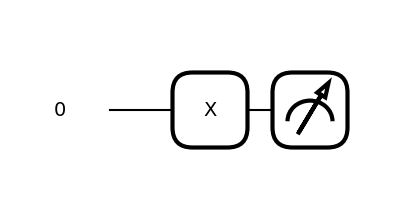

In [15]:
qml.draw_mpl(qc)()

array([1.+0.j, 0.+0.j])

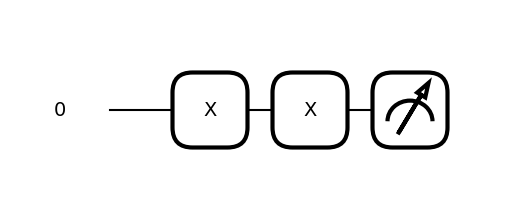

In [16]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    qml.X(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### Bramka Hadamarda 
Bramka Hadamarda przetwarza stan $|0\rangle$ na kombinacje liniowa (superpozycje) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, co oznacza, że pomiar zwróci z takim samym prawdopodobieństwem stanu `1` lub `0`. 
Stan ten często oznaczany jest jako: $|+\rangle$. 

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

$$ H\ket{0} = \frac{\sqrt{2}}{2} (\ket{0}+ \ket{1})$$
$$ H\ket{1} = \frac{\sqrt{2}}{2}(\ket{0}- \ket{1})$$

array([0.70710678+0.j, 0.70710678+0.j])

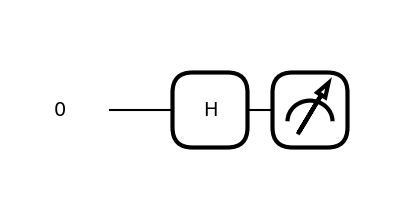

In [17]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

array([1.+0.j, 0.+0.j])

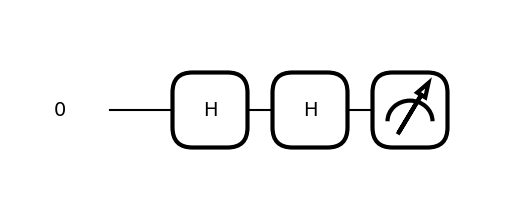

In [18]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

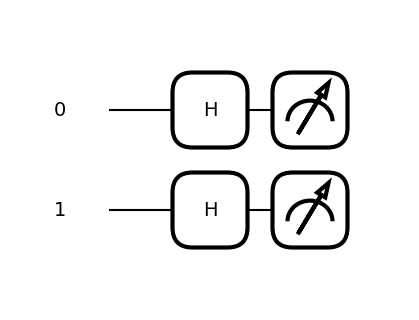

In [19]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)


def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

qml.draw_mpl(qc)()
qc()

array([1.+0.j, 0.+0.j])

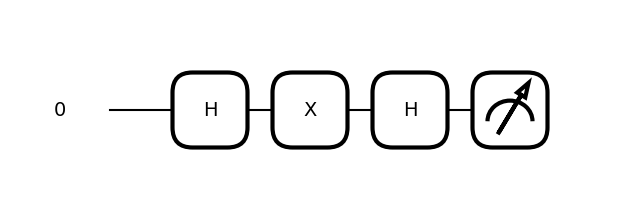

In [20]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(state):
    if state==1:
        qml.X(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qml.draw_mpl(qc)(0)
qc(0)

In [21]:
qc(1)

array([ 0.+0.j, -1.+0.j])

## do czego możemy wykorzystać te proste obwody? 

### Losowy bit

utwórz obwód kwantowy zawierający jeden qubit. Utwórz superpozycję stanu zero i jeden z wykorzystaniem odpowiedniej bramki. 

-[a)] wyświetl stan po pomiarze pojedynczego kubitu

-[b)] wyświetl prawdopodobieństwa otrzymania stanu 0 i 1 

-[c)] uruchom obwód 3 razy (do dev dodaj parametr , shots=3) i sprawdź wyniki otrzymywane przez metodę `qml.counts()` [link](https://docs.pennylane.ai/en/stable/code/api/pennylane.counts.html)

-[d)] uruchom powyzszą prcedurę 100 razy 

Do jakiego zdarzenia losowego podobne są wyniki? 


### Losowy bajt 

-[a)] bajt to 8 bitów - jaki zakres wartości jesteś w stanie przechowywać w 8 kubitach ? 

-[b)] wygeneruj 3 proby w pełni losowego bajtu - odkoduj wyniki w systemie int 

-[c)] oblicz różnicę dwóch bajtów dla których pierwsze cztery bity to 0, piąty bit pierwszego bajtu to 0 a drugiego bajtu to 1 . pozostałe bity są równe 1. 






### Gra w obracanie monety

Wykorzystując powyżej zdefiniowane bramki możemy zrealizowa następującą grę:

> W grze bierze udział dwóch graczy. 
Gracze dysponują monetą, której nie widzą w trakcie gry (np. jest zamknięta w pudełku). 
Natomiast wiedzą, że początkowo moneta ułożona jest orłem do góry (w stanie $\ket{0}$)
> Gra polega na wykonaniu trzech ruchów na przemian. 
Każdy ruch polega na odwróceniu monety bądź pozostawieniu jej w takim stanie w jakim była. 
Gracze nie wiedzą jaki ruch wykonuje przeciwnik. 
Po ostatnim ruchu pudełko zostaje otwarte i gracze sprawdzają w jakiej pozycji jest moneta. 
Pierwszy gracz wygrywa jeśli moneta jest w pozycji orła, a drugi jeśli przeciwnie. 

Szansa wygranej wynosi dla każdego $50\%$ i jak można sprawdzic nie istnieje strategia wygrywająca.




In [22]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)

def obwod(strategia):
    # print(f"strategia {strategia}")

    @qml.qnode(dev)
    def qc():
        for el in strategia:
            if el == 'X':
                # print("działam bramką X")
                qml.PauliX(wires=0)
        return qml.state()
    return qc

def sedzia(stan):
    if stan.real.tolist()[0]:
        return 1
    else:
        return 2

In [23]:
def klasycze_strategie():
    wyniki = []
    for ruch_1 in ['I','X']:
        for ruch_2 in ['I','X']:
            for ruch_3 in ['I','X']:
                strategia = ruch_1 + ruch_2 + ruch_3
                # print("strategia", strategia)
                ob = obwod(strategia)
                #qml.draw_mpl(ob)()
                stats = sedzia(ob())
                wyniki.append((strategia, stats))
    return wyniki

In [24]:
klasycze_strategie()

[('III', 1),
 ('IIX', 2),
 ('IXI', 2),
 ('IXX', 1),
 ('XII', 2),
 ('XIX', 1),
 ('XXI', 1),
 ('XXX', 2)]

(<Figure size 500x200 with 1 Axes>, <Axes: >)

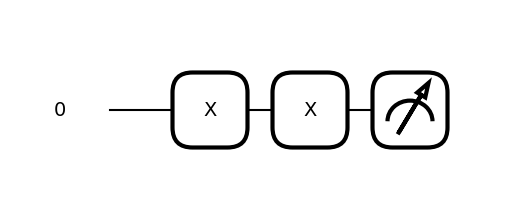

In [29]:
qml.draw_mpl(obwod('XIX'))()

Pytanie zasadnicze - a co jeśli zamienimy monetę na kubit?

Możliwe operacje pozostawienia kubitu w takim samym stanie - bramka I, zmiany stanu na przeciwny bramka X. Czyli pierwszy gracz ustala pierwszą bramkę, drugi drugą i ponownie pierwszy trzecią. Otwarcie pudełka to pomiar stanu kubitu. 

> Przeanalizuj wynik dla sekwencji I X I

A co jeśli pierwszy gracz wie, że działa na kubicie? 

> Czy może sprawic on, że  wygra zawsze? (skoro wie, że działa na kubicie może użyc innych bramek) 

In [30]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)

def obwod(strategia):
    # print(f"strategia {strategia}")

    @qml.qnode(dev)
    def qc():
        for el in strategia:
            if el == 'X':
                qml.PauliX(wires=0)
            elif el == "H":
                qml.Hadamard(wires=0)
        return qml.state()
    return qc

def sedzia(stan):
    if stan.real.tolist()[0]:
        return 1
    else:
        return 2

In [31]:
def kwantowa_strategia():
    wyniki = []
    for ruch_1 in ['H']:
        for ruch_2 in ['I','X']:
            for ruch_3 in ['H']:
                strategia = ruch_1 + ruch_2 + ruch_3
                ob = obwod(strategia)
                stats = sedzia(ob())
                wyniki.append((strategia, stats))
    return wyniki
        

In [32]:
kwantowa_strategia()

[('HIH', 1), ('HXH', 1)]

# a może model ?

# Titanic data

Dane mozna pobrać po utworzeniu (darmowego) konta na portalu Kaggle. 

[Pobierz dane](https://www.kaggle.com/c/titanic/data):
interesuje nas tylko plik `train.csv`.

Zobaczmy jak wyglądają nasze dane:

In [ ]:
import pandas as pd

train = pass 

print("train ma {} wierszy i {} kolumn".format(*train.shape))

print(f"train to obiekt typu {type(train)}")

Wykorzystaj metodę `info()` do sprawdzenia podstawowych informacji o danych.

In [ ]:
# Twój kod tutaj 

Metoda `info()` zwraca informacje o:
- nazwach kolumn, 
- ich indeksy,
- liczbę niepustych (`null`) elementów dla kazdej kolumny,  
- typy danych.

Informacje z metody `info()` przedstawiają tylko ogólne rzeczy, zobaczmy jak zbiór train wygląda w środku.

Do przeglądu danych wykorzystaj jedną z metod `head()` lub `tail()`.

In [ ]:
###### Twóje kody



Kazda kolumna reprezentuje jedną zmienną naszych danych. Identyfikatorem, bądź kluczem naszej tabeli jest `PassengerId`, która przyjmuje różną wartość dla każdego wiersza.

Czy taka zmienna moze być dobra do modelowania? 

Zmienna `Survived` to zmienna celu naszego zadania - pasazer przeżyl (1) lub nie (0). 

`Pclass` to zmienna opisująca klasę pokładu zgodnie z biletem.

### Czyszczenie danych

Nasze dane zawierają zarówno dane numeryczne jak i kategoryczne.

Niektóre kategorie reprezentowane są przez wartości liczbowe, a niektóre przez tekst.

Na podstawie metody `info()` wiemy również, że nie wszystkie kolumny mają zmienne wypełnione całkowicie. 

Większość algorytmów ML nie radzi sobie z brakami danych.

 Istnieją trzy podstawowe opcje jak możemy sobie z tym poradzić:

1. usunięcie wierszy w których pojawiają się jakieś braki danych.
2. usunięcie całej kolumny gdzie występują braki danych
3. Wypełnienie brakujących wartości (imputacja danych) zerem, wartością średnią, lub medianą.

> Zaproponuj zmienne do których użyłbyś metody 1, 2, lub 3

In [ ]:
### Twoje kody 

###

Następnym krokiem jest oszacowanie, które zmienne mogą nam się przydać ze wzgledu na swoje wartości, a które możemy odrzucić. 
Liczbę unikalnych wartości można znaleźć wykorzystując metodę `nunique()`

> Zweryfikuj i usuń kolumny, które nie będą nadawały się do analizy. Wykorzystaj metodę `drop()` 

In [ ]:
# Twoje kody

#

train.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex','Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

Skalowanie danych

In [ ]:
print('max wieku to {}'.format(train['Age'].max())) 
print('max zmiennej Fare to {}'.format(train['Fare'].max()))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['Age', 'Fare']])
train[['Age', 'Fare']] = scaler.transform(train[['Age', 'Fare']])
train.head()

In [ ]:
# test - uwaga na zwracany typ danych
sc = MinMaxScaler()
sc.fit(train)
tr=sc.transform(train)
print(type(tr),tr)

In [ ]:
#### Podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

input_data = train.iloc[:, 1:8]
labels = train.iloc[:,0]

tr_input, test_input, tr_labels, test_labels = train_test_split(input_data, labels, test_size=0.2, random_state=42)

Wygeneruj model klasyczny i kwantowy (korzystając tylko z bramki X i H) oraz oblicz acc. 

1. model który zawsze zwraca 0 
2. model który zawsze zwraca 1
3. model który losowo zwraca 0 lub 1 